Codez un script python qui permet de regrouper les DataSets de chacun en une seule DataSet.

In [1175]:
import pandas as pd
import glob

df = pd.DataFrame()

for f in glob.glob("./Dataset/*.csv"):
    df_chunk = pd.read_csv(f)
    df = pd.concat([df, df_chunk], axis=0)
df.reset_index(inplace=True, drop=True)

df.shape

(225, 12)

Appliquez les traitements nécessaires pour préparer la DataSet en utilisant Numpy et Pandas, (vous pouvez trouver un référentiel sur ressource).

(présenter votre pipeline dans le compte rendu).

NB. Le résultat de classification dépond essentiellement de la qualité du prétraitement.

In [1176]:
df.columns.unique()

df.sample(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
86,a,a,a,c,a,1,1.0,1,1,1,11,B
37,c,c,c,a,a,1,3,3,3,3,17,B
175,b,c,a,c,b,1.0,3,2,3,2,10,B
8,a,d,c,b,a,2,3,7,1,3,9,C
174,a,c,b,a,a,3.0,2,3,3,2,11,B
48,a,b,c,c,a,ù,1,~,1,2,8,C
137,NaN,NaN,NaN,a,b,1,2,3,3,2,6,C
206,(a),(a),(b),(a),(a),1,3,2,1,3,6,C
66,a,c,a,b,a,1,2,3,2,1,9,C
150,C,C,C,C,C,C,2,2,2,2,0,C


<strike>
Pour les colones Q1 à Q10 :
- Si la réponse est "a" "A" ou "1", remplacer par 1
- Sinon Si la réponse est "b" "B" ou "2", remplacer par 2
- Sinon Si la réponse est "c" "C" ou "3", remplacer par 3
- Sinon, remplacer toutes les autres valeurs par NaN.

Ne fonctionne pas, car les valeurs de Score et Interprétation ne sont pas calculées comme celà. Le problème vient de la saisie des données qui n'aurait pas dû autoriser de telles valeurs.
</strike>

Pour les colones Q1 à Q5 :
- Si la réponse est "a", remplacer par 1
- Sinon Si la réponse est "b", remplacer par 2
- Sinon Si la réponse est "c", remplacer par 3
- Sinon, remplacer toutes les autres valeurs par NaN.

Pour les colones Q6 à Q10 :
- Si la réponse est "1", remplacer par 1
- Sinon Si la réponse est "2", remplacer par 2
- Sinon Si la réponse est "3", remplacer par 3
- Sinon, remplacer toutes les autres valeurs par NaN.


In [1177]:
df_clean = df.copy()
df_clean.sample(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
55,c,c,c,a,a,2,3,1,3,2,13,B
73,a,b,a,a,a,1,&,1,&,é,6,C
45,b,c,c,a,NaN,NaN,2.0,2.0,3,1,8,C
195,a,a,c,a,a,a,3,3.0,1,3,14,B
120,NaN,a,b,c,a,1,2,3,1,NaN,8,C
79,c,b,b,a,a,1,1,1,1,1,9,C
202,q,x,5,0,98,345,azerty,bvc,1,qaz,1,C
14,A,NaN,c,b,NaN,3,2,1,3.0,2,7,C
56,b,b,b,b,b,2,2,2,2,2,0,C
184,v,s,a,x,r,g,y,R,E,d,1,C


In [1178]:
df_clean.isna().sum()

Q1                 8
Q2                12
Q3                13
Q4                10
Q5                14
Q6                12
Q7                10
Q8                12
Q9                10
Q10                8
Score              0
Interpretation     0
dtype: int64

In [1179]:
from numpy import nan as NaN

df_clean = df.copy()

for col in range(1, 6):
    col = str(f'Q{col}')
    df_clean[col] = df_clean[col].map({
        'a': 1,
        'b': 2,
        'c': 3,
        },
        na_action='ignore')

for col in range(6, 11):
    col = str(f'Q{col}')
    df_clean[col] = df_clean[col].map({'1': 1,
                                       '2': 2,
                                       '3': 3,
                                       },
                                      na_action='ignore')

df_clean.sample(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
84,3.0,3.0,3.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,17,B
110,1.0,2.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,10,B
61,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1,C
26,1.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,8,C
213,1.0,1.0,2.0,2.0,NaN,NaN,3.0,1.0,2.0,1.0,6,C
129,1.0,NaN,2.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,5,C
107,3.0,3.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,17,B
158,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6,C
77,3.0,3.0,2.0,2.0,1.0,NaN,3.0,2.0,1.0,3.0,12,B
159,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4,C


In [1180]:
df_clean.isna().sum()

Q1                 62
Q2                 51
Q3                 51
Q4                 48
Q5                 52
Q6                135
Q7                128
Q8                151
Q9                153
Q10               163
Score               0
Interpretation      0
dtype: int64

In [1181]:
df_clean.fillna(0, inplace=True)

In [1182]:
df_clean.isna().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Score             0
Interpretation    0
dtype: int64

In [1183]:
df_clean.sample(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
217,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,20,A
58,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2,C
165,3.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,11,B
29,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10,B
8,1.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,9,C
128,1.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,7,C
43,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11,B
13,0.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,1.0,13,B
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C
140,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,5,C


## Partie 2 : Développement et entraînement d’un modèle KNN

La technique de classification KNN est considérée comme la technique la plus simple pour appliquer la classification supervisée, tout simplement, une nouvelle donnée de test sera classée comme la majorité de ses voisins (la distance la plus proche).

À la suite de votre recherche sur le principe de KNN, nous développons notre modèle KNN.

Pour cela :

KNN From Scratch

- Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [1184]:
# Distance Amine :

def distance_amine(Data_1, Data_2, metric='euclidean', **kargs):

    if kargs.items():

        for key, value in kargs.items():
            if key == 'p':
                p = value
    else:
        p = 3

    if metric == 'euclidean':
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan':
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
        Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [1185]:
import numpy as np
from decimal import Decimal

In [1186]:
def euclidean(a, b):
    """Return Euclidean distance from a to b

    :a: start point
    :b: end point
    :return: the Euclidean distance

    """
    if type(a) != np.array:
        a = np.array(a)
    if type(b) != np.array:
        b = np.array(b)
    return np.sqrt(np.sum(np.square(a - b)))


assert 0.0 == euclidean([0, 0, 0], [0, 0, 0]), "euclidean() origin point error"
assert 5.196152422706632 == euclidean(np.array((1, 2, 3)), np.array((4, 5, 6))), "eclidean() error"

In [1187]:
def manhattan(a, b):
    """Return Manhattan distance from a to b

    :a: start point
    :b: end point
    :return: the Manhattan distance

    """
    return sum(abs(val1-val2) for val1, val2 in zip(a, b))


assert 0.0 == manhattan([0, 0, 0], [0, 0, 0]), "manhattan() origin point error"
assert 9 == manhattan([2, 4, 4, 6], [5, 5, 7, 8]), "manhattan() error"

In [1188]:
def minkowski(a, b, p):
    """Return Minkowski distance from a to b

    :a: start point
    :b: end point
    :return: the Minkowski distance

    """
    if p == 1:
        return manhattan(a, b)
    elif p == 2:
        return euclidean(a, b)
    else:
        def p_root(value, root):
            root_value = 1 / float(root)
            return round(Decimal(value) ** Decimal(root_value), 3)
        # pass the p_root function to calculate
        # all the value of vector parallelly
        return float(p_root(sum(pow(abs(x - y), p) for x, y in zip(a, b)), p))


assert 0.0 == minkowski([0, 0, 0], [0, 0, 0], 1), "minkowski() origin error"
assert 0.0 == minkowski([0, 0, 0], [0, 0, 0], 2), "minkowski() origin error"
assert 0.0 == minkowski([0, 0, 0], [0, 0, 0], 3), "minkowski() origin error"

assert 5.196152422706632 == minkowski(np.array((1, 2, 3)), np.array((4, 5, 6)), 2), "minkowski(), p=2 error"
assert 9 == minkowski([2, 4, 4, 6], [5, 5, 7, 8], 1),  "minkowski(), p=1 error"
assert 3.503 == minkowski([0, 2, 3, 4], [2, 4, 3, 7], 3), "minkowski() error"

In [1189]:
def distance(metric='Euclidean', **kargs) -> float:
    '''Return the distance between a and b

    :a: start point
    :b: end point
    :p: metric for Minkowski distance
    :metric: 'Euclidean', 'Manhattan' or 'Minkowski'
    :return: the distance
    '''
    if metric == 'Euclidean':
        return euclidean(kargs['a'], kargs['b'])
    elif metric == 'Manhattan':
        return manhattan(kargs['a'], kargs['b'])
    elif metric == 'Minkowski':
        return minkowski(kargs['a'], kargs['b'], kargs['p'])
    else:
        pass

In [1190]:

# Test distance()
assert 0.0 == distance(a=[0, 0, 0], b=[0, 0, 0]), "distance() same point error"
assert 5.196152422706632 == distance(a=np.array((1, 2, 3)), b=np.array((4, 5, 6))), "no metric='' error"

assert 5.196152422706632 == distance(a=np.array((1, 2, 3)), b=np.array((4, 5, 6)), metric='Euclidean'), "metric='Euclidean' error"
assert 9 == distance(a=[2, 4, 4, 6], b=[5, 5, 7, 8], metric='Manhattan'),  "metric='Manhattan' error"

assert 5.196152422706632 == distance(a=np.array((1, 2, 3)), b=np.array((4, 5, 6)), metric='Minkowski', p=2), "metric='Minkowski', p=2 error"
assert 9 == distance(a=[2, 4, 4, 6], b=[5, 5, 7, 8], p=1, metric='Minkowski'),  "metric='Minkowski', p=1 error"
assert 3.503 == distance(a=[0, 2, 3, 4], b=[2, 4, 3, 7], p=3, metric='Minkowski'),  "metric='Minkowski', p=3 error"

- Codez l’algorithme de KNN sous forme une fonction `(def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs))` qui :
  - Calcul la distance entre Data de test et Data d’apprentissage.
  - Trouve la/les distances plus proche de « k » voisins.
  - Classe Data de test selon la classe majoritaire de « k » voisins.
  - Retourne la classe de Data Test.

In [1191]:
def knn_search(Dt, Data, **kwargs) -> pd.DataFrame:
    """Return distances from Dt to all points in Data

    :Data: Dataframe of points
    :Dt: Point to compare
    :metric: @see distance().metric
    :returns: Nearest Neighbourgs

    """
    metric = kwargs.get("metric") if 'metric' in kwargs else "Euclidean"
    p = kwargs.get("p") if 'p' in kwargs else 2

    D = []
    for i in range(0, len(Data)):
        D.append(distance(metric, a=Dt, b=Data.iloc[i, :], p=p))
    D = pd.DataFrame(D, columns=['Distances'])
    return D

In [1192]:
df_test = pd.DataFrame([[0, 0, 0], [3, 3, 3], [1, 2, 3], [4, 5, 6]])

print(knn_search([0, 0, 0], df_test))
# print(knn_search([1, 1, 1], df_test))
# print(knn_search([2, 2, 2], df_test))
# print(knn_search([3, 3, 3], df_test))
# print(knn_search([1, 2, 3], df_test))

assert pd.DataFrame([0.0, 5.196152422706632, 3.7416573867739413, 8.774964387392123], columns=['Distances']).equals(knn_search([0, 0, 0], df_test)), "knn_search error"

   Distances
0   0.000000
1   5.196152
2   3.741657
3   8.774964


In [1193]:
def pred(D, Y, k) -> pd.core.series.Series:
    """Catégorie la plus représentée dans les k plus petites distances

    :D: Distances
    :Y: Targets labels
    :k: Nombre de voisins
    :returns: Label

    """
    # Création d'un DataFrame Distances / Labels
    df = pd.concat([D, Y], axis=1)
    # Ordoné par ordre croissant pour pouvoir trouver les plus petites valeurs
    df = df.sort_values(by=[df.columns[0]], ascending=True, na_position='last')
    # On ne garde que les `k` premières valeurs
    df = df.iloc[:k]
    return df[df.columns[-1]].mode()

In [1194]:

train_set = df_clean.iloc[:-1, :-2]
# print(train_set.sample(5, random_state=0))

label_set = df_clean.iloc[:-1, -1:]
# print(label_set.sample(5, random_state=0))

test_set = df_clean.iloc[-1:, :-2]
# print(test_set)

validation_set = df_clean.iloc[-1:, -1:]
# print(validation_set)

d_test = knn_search(test_set, train_set)

print(pred(d_test, label_set, 1))
print(pred(d_test, label_set, 2))
print(pred(d_test, label_set, 3))

0    C
dtype: object
0    C
dtype: object
0    C
dtype: object


In [1195]:
def KNN(Data_Test, Data_Train, Label_Train, k=1, metric='Euclidean', **kwargs):
    """Prédictions

    :Data_Test: Jeu de tests
    :Data_Train: Jeu d'apprentissage
    :Label_Train: Y
    :k: Nombre de voisins
    :metric: @see distance().metric
    :returns: TODO

    """
    p = kwargs.get("p") if 'p' in kwargs else 2

    # Les prédictions à retourner
    labels = pd.DataFrame(data=[], columns=["Predictions"])
    # Pour chaque donnée du jeu de test
    for i, dt in Data_Test.iterrows():
        # On récupère les distances relatives aux jeux d'entrainement
        dist = knn_search(dt, Data_Train, metric=metric, p=p)
        # On récupère la catégorie la plus représentée dans les k plus proches voisins
        label = pred(dist, Label_Train, k)
        # On ajoute la prédiction aux résultats
        labels.loc[i] = label[0]
    return labels

In [1196]:

def data_split(df, nb_test=1, random_state=0):
    """Split the dataframe in 4 parts

    :df: Dataframe to split
    :nb_test: How many tests ?
    :random_state: use this seed for  random split
    :returns: (train_set, label_set, test_set, validation_set)

    """
    train_set = df_clean.iloc[:-nb_test, :-2]
    label_set = df_clean.iloc[:-nb_test, -1:]
    test_set = df_clean.iloc[-nb_test:, :-2]
    validation_set = df_clean.iloc[-nb_test:, -1:]

    return (train_set, label_set, test_set, validation_set)

In [1197]:
nb_test = int(len(df_clean)*20/100)
nb_test = 10
train_set, label_set, test_set, validation_set = data_split(df_clean, nb_test, random_state=0)

# print("test",test_set)
# print("train",train_set)
# print("label",label_set)
# print("----")
targets = validation_set[-nb_test:]
# print("Targets : ", targets)
# print(type(targets))
# print(targets.index)

predictions = KNN(test_set, train_set, label_set, 1)
# predictions = predictions.set_index(targets.index)
# print("Predictions : ", predictions)
# print(type(predictions))

comparaison = pd.concat([targets, predictions], axis=1)

# comparaison = pd.merge(targets, predictions, left_index=True, right_index=True)
# comparaison = targets.join(predictions)
# comparaison = targets.join(predictions, lsuffix='_caller', rsuffix='_other')

# comparaison = targets
# comparaison["Prédictions"] = predictions

print(comparaison)

    Interpretation Predictions
215              B           B
216              B           C
217              A           B
218              B           B
219              C           C
220              B           C
221              C           C
222              C           C
223              C           C
224              C           C


- Réalisez des expérimentations en variant la distance et le nombre de « k ».

In [1198]:
for k in range(1, 10):
    predictions = KNN(test_set, train_set, label_set, k)
    comparaison = pd.concat([targets, predictions], axis=1)
    print("K:", k, comparaison)

K: 1     Interpretation Predictions
215              B           B
216              B           C
217              A           B
218              B           B
219              C           C
220              B           C
221              C           C
222              C           C
223              C           C
224              C           C
K: 2     Interpretation Predictions
215              B           B
216              B           C
217              A           A
218              B           B
219              C           C
220              B           B
221              C           C
222              C           C
223              C           C
224              C           C
K: 3     Interpretation Predictions
215              B           C
216              B           C
217              A           A
218              B           B
219              C           C
220              B           C
221              C           C
222              C           C
223              C      

- Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

In [1199]:
def accuracy(df):
    """Calcule la précision des prédictions

    :df: Prédictions à évaluer
    :returns: prédictions justes / Total
    """
    total = len(df)
    justes = 0
    # Pour chaque prédiction
    for pred in df.values:
        # Si la prédiction est juste
        if pred[0] == pred[1]:
            # On la compte
            justes += 1
    return justes/total


assert 1.0 == accuracy(pd.DataFrame([("A", "A"), ("B", "B"), ("A", "A")]))
assert 2/3 == accuracy(pd.DataFrame([("A", "A"), ("B", "B"), ("A", "B")]))
assert 0.0 == accuracy(pd.DataFrame([("A", "B"), ("B", "C"), ("A", "C")]))

In [1200]:
# Calcul des performances

perf_euclidean = pd.DataFrame({'k': pd.Series(dtype='int'),
                               'Accuracy': pd.Series(dtype='float')})

for k in range(1, 20):
    predictions = KNN(test_set, train_set, label_set, k)
    comparaison = pd.concat([targets, predictions], axis=1)
    perf = pd.DataFrame([{"k": k, "Accuracy": accuracy(comparaison)}])
    perf_euclidean = perf_euclidean.append(perf, ignore_index=True)

print(perf_euclidean)

     k  Accuracy
0    1       0.7
1    2       0.9
2    3       0.7
3    4       0.8
4    5       0.6
5    6       0.6
6    7       0.5
7    8       0.5
8    9       0.6
9   10       0.7
10  11       0.7
11  12       0.7
12  13       0.6
13  14       0.5
14  15       0.5
15  16       0.5
16  17       0.5
17  18       0.5
18  19       0.5


C    5
B    4
A    1
Name: Interpretation, dtype: int64

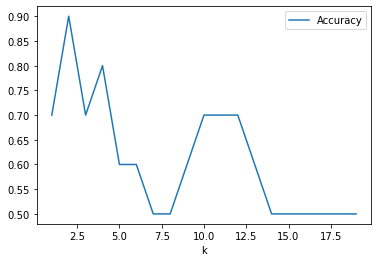

In [1201]:
plt_euclidean = perf_euclidean.plot(kind='line', x='k', y='Accuracy')

targets.Interpretation.value_counts()

In [1202]:
perf_manhattan = pd.DataFrame({'k': pd.Series(dtype='int'),
                               'Accuracy': pd.Series(dtype='float')})

for k in range(1, 20):
    predictions = KNN(test_set, train_set, label_set, k, metric='Manhattan')
    comparaison = pd.concat([targets, predictions], axis=1)
    perf = pd.DataFrame([{"k": k, "Accuracy": accuracy(comparaison)}])
    perf_manhattan = perf_manhattan.append(perf, ignore_index=True)

print(perf_manhattan)

     k  Accuracy
0    1       0.8
1    2       0.8
2    3       0.8
3    4       0.8
4    5       0.7
5    6       0.7
6    7       0.8
7    8       0.8
8    9       0.6
9   10       0.7
10  11       0.6
11  12       0.8
12  13       0.7
13  14       0.8
14  15       0.6
15  16       0.6
16  17       0.6
17  18       0.6
18  19       0.6


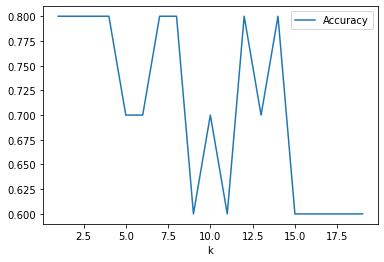

In [1203]:
plt_manhattan = perf_manhattan.plot(kind='line', x='k', y='Accuracy')

In [1204]:
perf_minkowski = pd.DataFrame({'k': pd.Series(dtype='int'),
                               'Accuracy': pd.Series(dtype='float')})

for k in range(1, 20):
    predictions = KNN(test_set, train_set, label_set, k, metric="Minkowski", p=5)
    comparaison = pd.concat([targets, predictions], axis=1)
    perf = pd.DataFrame([{"k": k, "Accuracy": accuracy(comparaison)}])
    perf_minkowski = perf_minkowski.append(perf, ignore_index=True)

print(perf_minkowski)

     k  Accuracy
0    1       0.6
1    2       0.5
2    3       0.5
3    4       0.5
4    5       0.6
5    6       0.6
6    7       0.5
7    8       0.5
8    9       0.6
9   10       0.7
10  11       0.7
11  12       0.8
12  13       0.6
13  14       0.5
14  15       0.5
15  16       0.5
16  17       0.5
17  18       0.5
18  19       0.5


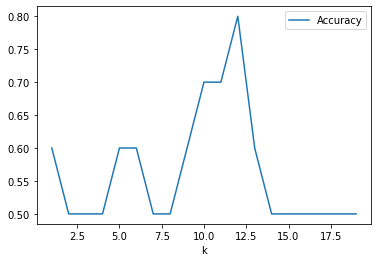

In [1205]:
plt_minkowski = perf_minkowski.plot(kind='line', x='k', y='Accuracy')

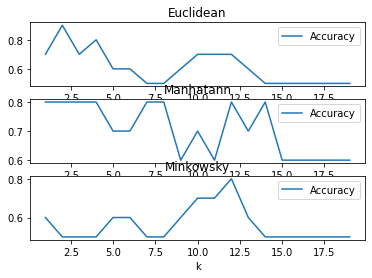

In [1206]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(3, 1, 1)
perf_euclidean.plot(kind='line', x='k', y='Accuracy', ax=plt.gca(), title="Euclidean")
plt.subplot(3, 1, 2)
perf_manhattan.plot(kind='line', x='k', y='Accuracy', ax=plt.gca(), title="Manhatann")
plt.subplot(3, 1, 3)
perf_minkowski.plot(kind='line', x='k', y='Accuracy', ax=plt.gca(), title="Minkowsky")
plt.show()

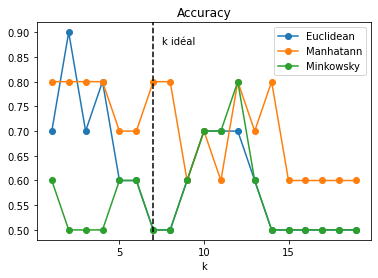

In [1226]:
import matplotlib.pyplot as plt

# Le k idéal est souvant le double du nombre de cardinalité de la Target.
# On y ajoute 1 pour avoir un nombre impair de choix et pouvoir prendre une décision.
k_ideal = df_clean.Interpretation.nunique() * 2 + 1

ax = perf_euclidean.plot(kind='line', x='k', y='Accuracy', label="Euclidean", marker='o', title="Accuracy")
perf_manhattan.plot(kind='line', x='k', y='Accuracy', label="Manhatann", marker='o', ax=ax)
perf_minkowski.plot(kind='line', x='k', y='Accuracy', label="Minkowsky", marker='o', ax=ax)
ax.axvline(k_ideal, label="k idéal", color='k', linestyle='--')
ax.text(k_ideal+0.5, 0.9, 'k idéal', transform=ax.get_xaxis_text1_transform(0)[0])
ax.locator_params(integer=True)
plt.show()


KNN Sklearn

La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

- Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles.

In [1208]:
# Import LabelEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [1209]:
# creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
interpretation_encoded = le.fit_transform(df_clean.Interpretation)
print(interpretation_encoded)

[1 2 0 2 1 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2
 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1
 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 1 1 0 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2
 2 2 1 2 2 1 0 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 0 1 2 1 2
 2 2 2]


In [1210]:
features = df_clean.iloc[:, :-2]

label = interpretation_encoded

In [1211]:
# Initiation du modèle
model = KNeighborsClassifier(n_neighbors=3)

# Apprentissage du modèle
model.fit(features, label)

# Predictions
predicted = model.predict(test_set)

target_labels = targets.T.to_numpy()[0]
predicted_labels = le.inverse_transform(predicted)
print(target_labels)
print(predicted_labels)

['B' 'B' 'A' 'B' 'C' 'B' 'C' 'C' 'C' 'C']
['B' 'C' 'A' 'B' 'C' 'B' 'C' 'C' 'C' 'C']


In [1212]:
print(model.get_params())

model.score(test_set, predicted_labels)
print(model)

from sklearn. metrics import accuracy_score
print("Accuracy : ", accuracy_score(target_labels, predicted_labels))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=3)
Accuracy :  0.9


- Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).

In [1213]:
# K-Fold Amine :
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

X = df_clean.iloc[:, :-2]
y = df_clean.iloc[:, -1:]
print(X, y)

kf = KFold(n_splits=3)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_Train = X[train_index, :]
    y_Train = y[train_index]

    X_Test = X[test_index, :]
    y_Test = y[test_index]

    model = KNN(n_neighbors=3)
    model.fit(X_Train, y_Train)
    y_pred = model.predict(X_Test)
    P = accuracy_score(y_Test, y_pred)

    print("Performance:", P)

      Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10
0    1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
1    2.0  2.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0
2    3.0  3.0  3.0  3.0  3.0  0.0  0.0  0.0  0.0  0.0
3    1.0  2.0  3.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0
4    2.0  3.0  1.0  3.0  1.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
220  3.0  3.0  0.0  3.0  3.0  0.0  0.0  0.0  3.0  0.0
221  2.0  1.0  3.0  0.0  2.0  0.0  0.0  0.0  3.0  0.0
222  1.0  3.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0
223  1.0  0.0  0.0  1.0  2.0  0.0  0.0  0.0  0.0  0.0
224  0.0  2.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0

[225 rows x 10 columns]     Interpretation
0                B
1                C
2                A
3                C
4                B
..             ...
220              B
221              C
222              C
223              C
224              C

[225 rows x 1 columns]


TypeError: '(array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224]), slice(None, None, None))' is an invalid key

In [1215]:
# Code python de Pipeline et Gridsearch Amine

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())])

parameters = {'svc__kernel': ['linear', 'rbf'],
              'svc__C': [1, 10]}

Exp = GridSearchCV(pipe,
                   param_grid=parameters,
                   cv=2)

X_Train = X[train_index, :]
y_Train = y[train_index]

Exp.fit(X_Train, y_Train)

TypeError: '(array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224]), slice(None, None, None))' is an invalid key

## Partie 3 : Mettre en place la solution dans l’application de test de personnalité

- Utilisez la fonction « joblib » pour enregistrer votre modèle, une fois vous avez préparé votre meilleur modèle de classification Faites intégrer cette solution à l’Application **Test de Personnalité** et adapter l’application pour comparer le résultat avec et sans IA.